In [31]:
import pandas as pd
import  requests
from  bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"

In [5]:
data = requests.get(url).text


In [6]:
soup = BeautifulSoup(data,'html.parser')

In [7]:
netflix_data = pd.DataFrame(columns = ['Date','Open','High','Low','Close','adj_close','Volume'])

In [8]:
netflix_data

,Date,Open,High,Low,Close,adj_close,Volume


In [9]:
for row in soup.find('tbody').find_all('tr'):
    col = row.find_all('td')
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low =  col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text

    netflix_data = pd.concat([netflix_data,pd.DataFrame({'Date':[date],'Open':[Open],'High':[high],'Low':[low],'Close':[close],'adj_close':[adj_close],'Volume':[volume]})])
        
    
    

In [10]:
netflix_data

,Date,Open,High,Low,Close,adj_close,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,"78,560,600"
0,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,"66,927,600"
0,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,"111,573,300"
0,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,"90,183,900"
0,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,"61,902,300"
...,...,...,...,...,...,...,...
0,"Jan 01, 2016",109.00,122.18,90.11,91.84,91.84,"488,193,200"
0,"Dec 01, 2015",124.47,133.27,113.85,114.38,114.38,"319,939,200"
0,"Nov 01, 2015",109.20,126.60,101.86,123.33,123.33,"320,321,800"
0,"Oct 01, 2015",102.91,115.83,96.26,108.38,108.38,"446,204,400"


In [11]:
##Extracting Data using Pandas  library

In [12]:
data = pd.read_html(url)[0]
data

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,78560600
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,66927600
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,111573300
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,90183900
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,61902300
...,...,...,...,...,...,...,...
66,"Dec 01, 2015",124.47,133.27,113.85,114.38,114.38,319939200
67,"Nov 01, 2015",109.20,126.60,101.86,123.33,123.33,320321800
68,"Oct 01, 2015",102.91,115.83,96.26,108.38,108.38,446204400
69,"Sep 01, 2015",109.35,111.24,93.55,103.26,103.26,497401200


In [21]:
data.drop(index = 70, inplace = True)

In [25]:
data['Date'] = pd.to_datetime(data['Date'])

In [29]:
data

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,2021-06-01,504.01,536.13,482.14,528.21,528.21,78560600
1,2021-05-01,512.65,518.95,478.54,502.81,502.81,66927600
2,2021-04-01,529.93,563.56,499.00,513.47,513.47,111573300
3,2021-03-01,545.57,556.99,492.85,521.66,521.66,90183900
4,2021-02-01,536.79,566.65,518.28,538.85,538.85,61902300
...,...,...,...,...,...,...,...
65,2016-01-01,109.00,122.18,90.11,91.84,91.84,488193200
66,2015-12-01,124.47,133.27,113.85,114.38,114.38,319939200
67,2015-11-01,109.20,126.60,101.86,123.33,123.33,320321800
68,2015-10-01,102.91,115.83,96.26,108.38,108.38,446204400


In [33]:
data['Year'] = data['Date'].dt.year

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         70 non-null     datetime64[ns]
 1   Open         70 non-null     object        
 2   High         70 non-null     object        
 3   Low          70 non-null     object        
 4   Close*       70 non-null     object        
 5   Adj Close**  70 non-null     object        
 6   Volume       70 non-null     object        
 7   Year         70 non-null     int32         
dtypes: datetime64[ns](1), int32(1), object(6)
memory usage: 4.2+ KB


In [55]:
data['Open'] = pd.to_numeric(data['Open'])
data['High'] = pd.to_numeric(data['High'])
data['Low']=pd.to_numeric(data['Low'])
data['Close*']=pd.to_numeric(data['Close*'])
data['Adj Close**']= pd.to_numeric(data['Adj Close**'])
data['Volume']=pd.to_numeric(data['Volume'])

In [67]:
d = data.groupby('Year')['High'].sum().reset_index()


<Axes: xlabel='Year', ylabel='High'>

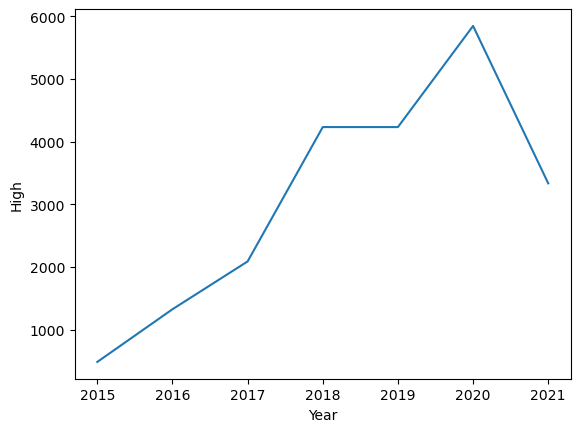

In [69]:
sns.lineplot(data = d, x='Year', y='High')

<Axes: xlabel='Year', ylabel='Low'>

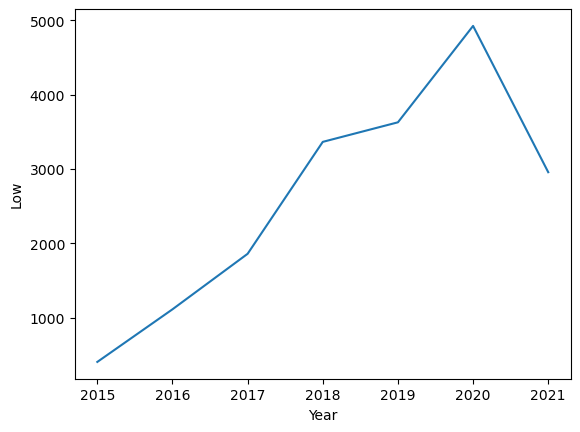

In [71]:
d = data.groupby('Year')['Low'].sum().reset_index()
sns.lineplot(data = d, x='Year', y='Low')